In [1]:
%load_ext autoreload
#To update the imported files

In [2]:
%autoreload
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
# Store the initial directory when you start the notebook
initial_directory = os.getcwd()

# Create a function to reset to the initial directory
def reset_to_initial_directory():
    os.chdir(initial_directory)

In [4]:
import sys
sys.path.append("../Models")


In [5]:
reset_to_initial_directory()

In [6]:
current_path = os.getcwd()
print("Current Path:", current_path)

Current Path: /Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Stack


In [7]:
reset_to_initial_directory()
%cd "../Models/KNN"
%run KNN.ipynb
knn_pred = y_pred_knn
print(knn_pred)
reset_to_initial_directory()

/Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Models/KNN
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

A: Mean Absolute Error: 150.38370883475199
B: Mean Absolute Error: 28.481654992061195
C: Mean Absolute Error: 28.467947852760734
[48.18 48.18 42.02 ...  0.    0.    0.  ]


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


/Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Models/Linear_Regression
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
A: Mean Absolute Error: 164.33578144835977
B: Mean Absolute Error: 27.535594863044608
C: Mean Absolute Error: 27.46695684720859
Pearson correlation: 0.92


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

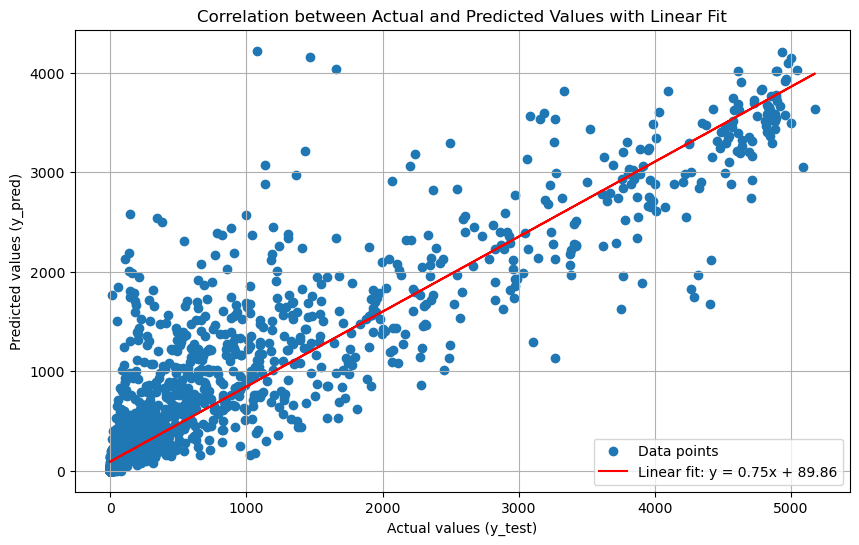

[43.0732    42.45392   41.49943   ...  2.3140688  0.         0.       ]


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [8]:
reset_to_initial_directory()
%cd "../Models/Linear_Regression"
%run Linear_regression.ipynb
lin_pred = y_pred_Lin_reg
print(lin_pred)
reset_to_initial_directory()

In [9]:
reset_to_initial_directory()
%cd "../Models/RF"
%run Random_Forest.ipynb
RF_pred = y_pred_rf
print(RF_pred)
reset_to_initial_directory()

/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


/Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Models/RF
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623

A: Mean Absolute Error: 145.0946539331094
B: Mean Absolute Error: 26.134075102844804
C: Mean Absolute Error: 25.106488253344217
[2.29311041e+01 2.29311041e+01 2.29311041e+01 ... 1.95701571e-01
 4.35096234e-03 8.39528112e-04]


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [10]:
reset_to_initial_directory()
%cd "../Models/XGB"
%run XGBoost.ipynb
xgb_pred = y_pred_xgb
print(xgb_pred)
reset_to_initial_directory()

/Users/simenfritzner/Documents/Skole/Semester 5/Maskinlæring/ML_Task/TDT4173-ML-task/src/Models/XGB
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarn

A: Mean Absolute Error: 150.38947550848917
B: Mean Absolute Error: 28.185538404414416
C: Mean Absolute Error: 25.30790992879749
[12.485192   12.485192   12.485192   ...  1.1711347   0.31838492
  0.31838492]


/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/simenfritzner/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


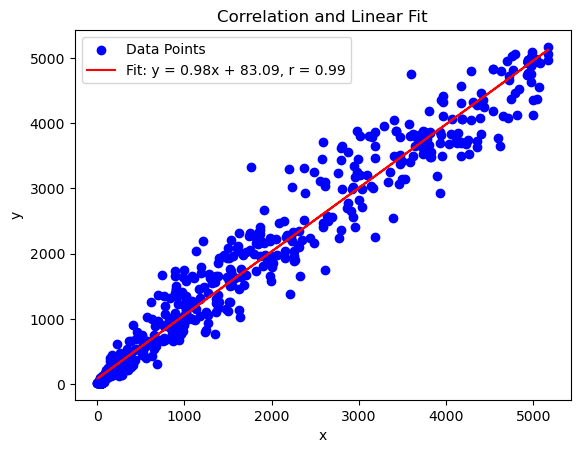

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Sample numpy arrays
x = knn_pred[0:720]
y = RF_pred[0:720]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(x, slope*x + intercept, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}, r = {r_value:.2f}')

# Customize the plot
plt.title('Correlation and Linear Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()

In [12]:
meta_model = LinearRegression()
#den må fittes
meta_model.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
X_new_meta = np.column_stack((lin_pred, xg_pred))

y_new_pred = lin_pred.pred(X_new_meta)
